In [194]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
from datetime import time
data = pd.read_csv("../data/archive/anime.csv")


In [195]:
data.head()

,Anime,Release_date,Length,Genre,Rating
0,Fullmetal Alchemist: Brotherhood,(2009-2010),24 min,"Animation, Action, Adventure",9.1
1,Attack on Titan,(2013-2023),24 min,"Animation, Action, Adventure",9.0
2,Hunter x Hunter,(2011-2014),24 min,"Animation, Action, Adventure",9.0
3,Bleach: Thousand-Year Blood War,(2022- ),24 min,"Animation, Action, Adventure",9.0
4,Ginga eiyû densetsu,(1988-1997),25 min,"Animation, Action, Drama",9.0


In [196]:
data["Rating"].describe()

count    181.000000
mean       7.602210
std        0.787609
min        4.600000
25%        7.000000
50%        7.600000
75%        8.200000
max        9.100000
Name: Rating, dtype: float64

In [197]:
data["Rating"].max()

9.1

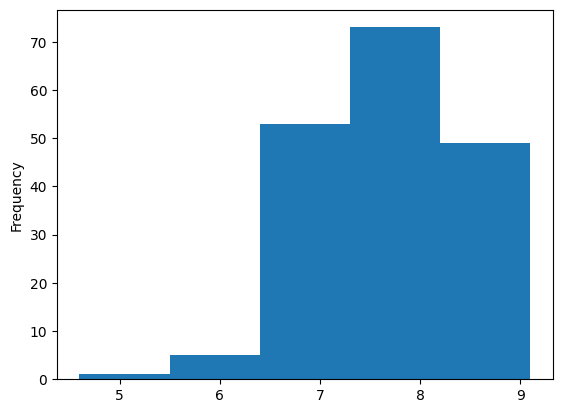

In [198]:
# Plot a histogram
data['Rating'].plot(kind='hist', bins=5, label='Histogram')
plot.show()

In [199]:
df = data["Genre"].str.split(",", expand=True)



In [200]:
df.rename(columns = {0:'Genre1', 1:'Genre2', 2:'Genre3'}, inplace=True)


In [201]:
df

,Genre1,Genre2,Genre3
0,Animation,Action,Adventure
1,Animation,Action,Adventure
2,Animation,Action,Adventure
3,Animation,Action,Adventure
4,Animation,Action,Drama
...,...,...,...
176,Animation,Action,Adventure
177,Animation,Action,Adventure
178,Animation,Action,Adventure
179,Animation,Action,Adventure


In [202]:
new_df = pd.concat([data,df],axis=1)

In [203]:
new_df

,Anime,Release_date,Length,Genre,Rating,Genre1,Genre2,Genre3
0,Fullmetal Alchemist: Brotherhood,(2009-2010),24 min,"Animation, Action, Adventure",9.1,Animation,Action,Adventure
1,Attack on Titan,(2013-2023),24 min,"Animation, Action, Adventure",9.0,Animation,Action,Adventure
2,Hunter x Hunter,(2011-2014),24 min,"Animation, Action, Adventure",9.0,Animation,Action,Adventure
3,Bleach: Thousand-Year Blood War,(2022- ),24 min,"Animation, Action, Adventure",9.0,Animation,Action,Adventure
4,Ginga eiyû densetsu,(1988-1997),25 min,"Animation, Action, Drama",9.0,Animation,Action,Drama
...,...,...,...,...,...,...,...,...
176,Isekai Meikyuu de Harem o,-2022.0,24 min,"Animation, Action, Adventure",6.3,Animation,Action,Adventure
177,Yasuke,-2021.0,30 min,"Animation, Action, Adventure",6.2,Animation,Action,Adventure
178,Ikki Tousen,(2003- ),325 min,"Animation, Action, Adventure",5.9,Animation,Action,Adventure
179,Bakugan Savaşçıları,(2007-2011),22 min,"Animation, Action, Adventure",5.7,Animation,Action,Adventure


In [204]:
new_df.drop('Genre', axis=1)

,Anime,Release_date,Length,Rating,Genre1,Genre2,Genre3
0,Fullmetal Alchemist: Brotherhood,(2009-2010),24 min,9.1,Animation,Action,Adventure
1,Attack on Titan,(2013-2023),24 min,9.0,Animation,Action,Adventure
2,Hunter x Hunter,(2011-2014),24 min,9.0,Animation,Action,Adventure
3,Bleach: Thousand-Year Blood War,(2022- ),24 min,9.0,Animation,Action,Adventure
4,Ginga eiyû densetsu,(1988-1997),25 min,9.0,Animation,Action,Drama
...,...,...,...,...,...,...,...
176,Isekai Meikyuu de Harem o,-2022.0,24 min,6.3,Animation,Action,Adventure
177,Yasuke,-2021.0,30 min,6.2,Animation,Action,Adventure
178,Ikki Tousen,(2003- ),325 min,5.9,Animation,Action,Adventure
179,Bakugan Savaşçıları,(2007-2011),22 min,5.7,Animation,Action,Adventure


In [205]:
ani = new_df['Genre'].value_counts()
ani

Genre
Animation, Action, Adventure     74
Animation, Comedy, Drama         24
Animation, Action, Comedy        19
Animation, Action, Drama         13
Animation, Comedy, Fantasy       11
Animation, Comedy, Romance       11
Animation, Adventure, Comedy      6
Animation, Action, Crime          6
Animation, Adventure, Drama       3
Animation, Crime, Drama           3
Animation, Drama, Family          1
Animation, Adventure, Mystery     1
Animation, Short, Comedy          1
Animation, Drama, Fantasy         1
Animation, Drama, Horror          1
Animation, Drama, Thriller        1
Animation, Comedy                 1
Animation, Action, Sci-Fi         1
Animation, Drama, Mystery         1
Animation, Adventure, Fantasy     1
Animation, Action, Fantasy        1
Name: count, dtype: int64

In [206]:
print(ani.dtypes)

int64


<Axes: xlabel='Genre'>

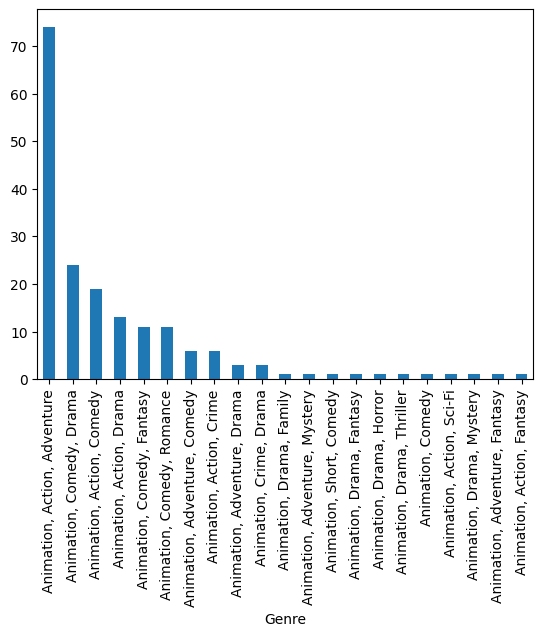

In [207]:
ani.plot(kind='bar')

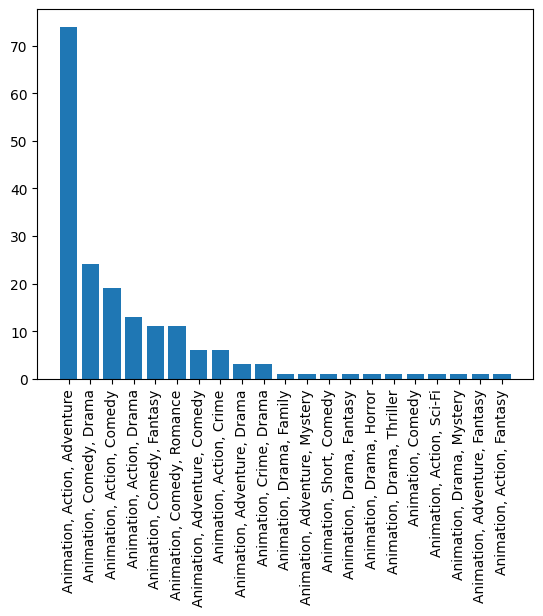

In [208]:
plot.bar(x=ani.index,height=ani.values)
_=plot.xticks(rotation=90)

In [209]:
new_df["Length"].describe()

count        167
unique        13
top       24 min
freq          93
Name: Length, dtype: object

In [210]:
new_df1 = data["Length"].str.split("min", expand=True)

In [211]:
new_df1 = new_df1.drop(1, axis=1)

In [212]:
new_df1.rename(columns = {0:'new_length'}, inplace=True)

In [213]:
new_df1

,new_length
0,24
1,24
2,24
3,24
4,25
...,...
176,24
177,30
178,325
179,22


In [214]:
new_df1.dtypes

new_length    object
dtype: object

In [215]:
new_df1.isna().sum()

new_length    14
dtype: int64

In [216]:
new_df1 = new_df1.dropna()

In [217]:
new_df1['new_length']=new_df1['new_length'].astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10476\402369363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['new_length']=new_df1['new_length'].astype(int)


<Axes: >

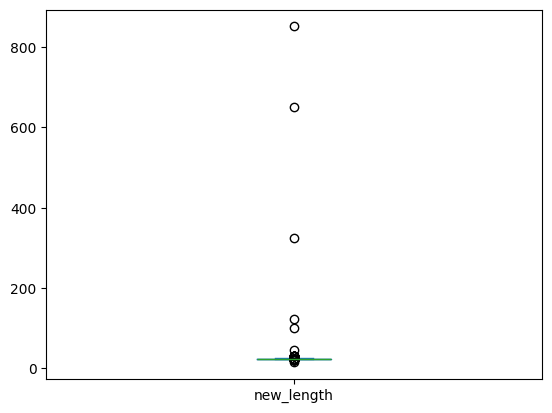

In [163]:
new_df1['new_length'].plot(kind='box')